<h2>Corona Zahlen Deutschland und Bundesländer, sowie <br> 
    Krankenhausdaten Intensiv Behandlungen in deutschen Krankenhäusern<br>
    im Vergleich zur Belegung durch andere Intensivfälle, sowie <br>
    Entwicklung der Krankenhaus Landschaft, Betten Anzahl, <br>
    Fallzahlen, Belegdauer, cc..</h2>

Letztes Update 24.12.2020

Quelle: https://www.divi.de/register/tagesreport 
        
Daten werden durch Restart des Notebooks täglich aktualisiert

Chart Erstellung mit Plotly (Plotly Python Open Source Graphing Library)

Link: https://plotly.com/python/

In [26]:
from __future__ import print_function
import folium

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [27]:
#load hospital data
intensiv_org_df=pd.read_csv("https://www.divi.de/joomlatools-files/docman-files/divi-intensivregister-tagesreports-csv/DIVI-Intensivregister_2020-12-24_12-15.csv")
hospital_df=pd.read_csv('data/chart/hospital_beds_clients.csv',sep=';')
germany_df=pd.read_csv('data/act/covid_germany_all.csv', sep=';')
gemeinde_df=pd.read_csv('data/chart/gemeinde_key.csv', sep=';')

#load R-Wert
r_df=pd.read_csv('data/act/r_wert.csv', sep=';')

#counties
county_date_df=pd.read_csv('data/act/german_conf_heald_death_data.csv', sep=';')
county_list_df=pd.read_csv('data/act/german_counties_conf_heald_death.csv', sep=';')
country_list_df=pd.read_csv('data/act/german_d_conf_heald_death.csv', sep=';')

In [28]:
#country_df.head()

<h2>Entwicklung R-Wert 24.11-24.12.2020</h2>

Quelle: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.html

In [29]:
r_df1 = r_df.sort_values('R_Wert', ascending=True)
r_df1.head(30)

,Datum,R_Wert
1,25.11.20,"0,86"
0,24.11.20,"0,87"
4,28.11.20,"0,93"
2,26.11.20,"0,94"
3,27.11.20,"0,94"
24,18.12.20,"0,97"
25,19.12.20,"0,97"
23,17.12.20,"0,99"
22,16.12.20,"1,01"
5,29.11.20,"1,02"


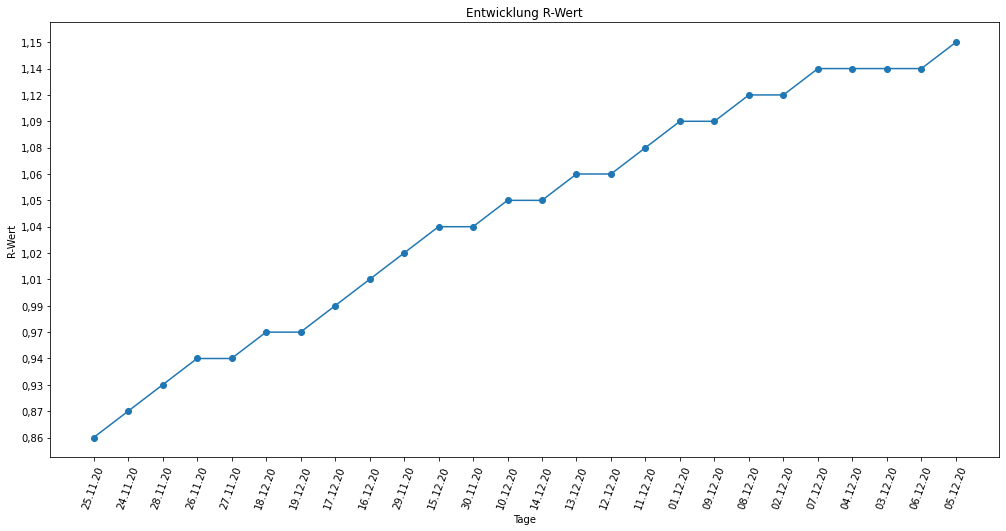

In [30]:
plt.rcParams["figure.figsize"] = (17,8)
plt.xticks(rotation=70)


# Change the line plot below to a scatter plot
plt.scatter(r_df1.Datum, r_df1.R_Wert)
# Make a line plot: year on the x-axis, pop on the y-axis
plt.plot(r_df1.Datum, r_df1.R_Wert)

plt.xlabel('Tage')
plt.ylabel('R-Wert')
plt.title('Entwicklung R-Wert')

# Show plot
plt.show()

<h2>Corona Zahlen Deutschland - Positive-, Geheilte- und Todesfälle</h2>

Quelle: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html

In [31]:
country_list_df.head()

,Land,Erkrankte,+/- z. VT,Genesene,+/- z. VT.1,Todesfälle,+/- z. VT.2
0,Deutschland,1.617.271,25.89,1.201.643,24766,29333,419


<h2>Bundesländer 24.12.2020 +/- z. Vortag</h2>
<br>

In [32]:
county_list_df.head(16)

,Bundesland,Land,Erkrankte,+/- z. VT,Genesene,+/- z. VT.1,Todesfälle,+/- z. VT.2
0,Nordrhein-Westfalen,Deutschland,373298,4240,289063,5370,5835,57
1,Bayern,Deutschland,305866,3985,231435,4450,6117,44
2,Baden-Württemberg,Deutschland,225354,3478,163732,3574,4373,42
3,Hessen,Deutschland,129206,2992,95652,1845,2396,65
4,Niedersachsen,Deutschland,119839,3971,78000,3000,2658,96
5,Berlin,Deutschland,100346,1109,82164,1243,1764,10
6,Rheinland-Pfalz,Deutschland,92082,952,70815,1182,1116,11
7,Sachsen,Deutschland,67549,801,46388,848,1213,15
8,Hamburg,Deutschland,40078,1181,26177,727,878,22
9,Brandenburg,Deutschland,37324,1056,23939,856,805,14


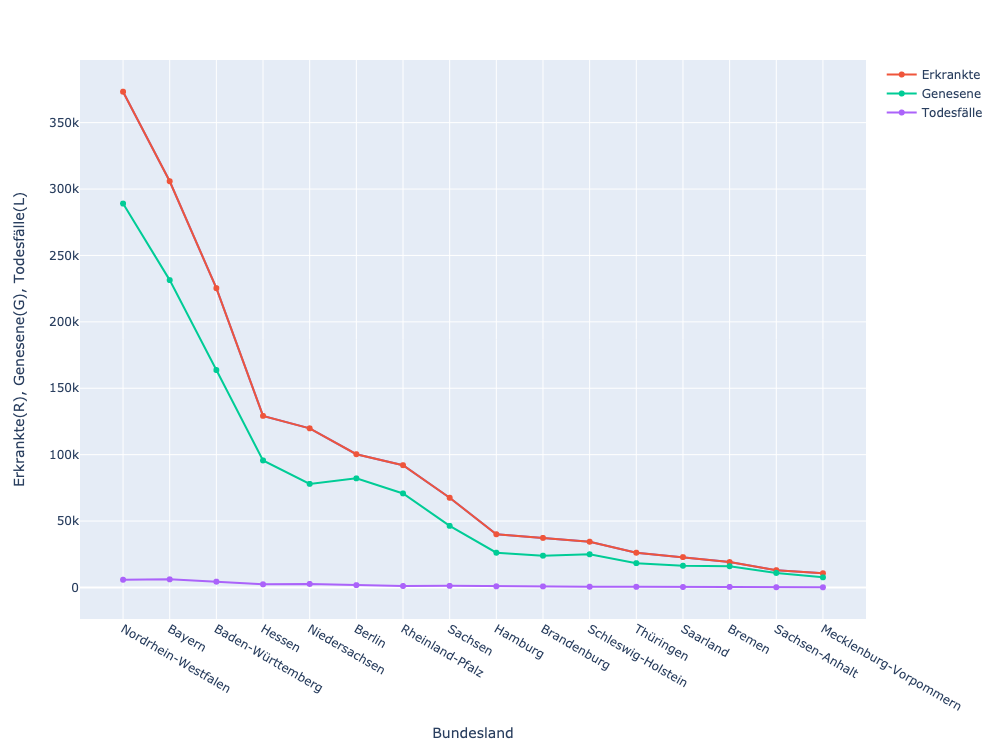

In [33]:
# Plot 
fig = px.line(county_list_df, x='Bundesland', y='Erkrankte')

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_list_df['Bundesland'], y=county_list_df['Erkrankte'], name='Erkrankte') # Not what is desired - need a line

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_list_df['Bundesland'], y=county_list_df['Genesene'], name='Genesene') # Not what is desired - need a line

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_list_df['Bundesland'], y=county_list_df['Todesfälle'], name='Todesfälle') # Not what is desired - need a line

fig.update_yaxes(title_text='Erkrankte(R), Genesene(G), Todesfälle(L)')              
              
# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2>Entwicklung Erkrankte, Genesene, Todesfälle nach Datum 24.11-24.12.2020</h2>

Die Zahlen sind nur die täglichen Zuwächse, keine Gesamtzahlen

In [34]:
county_date_df.head(100)

,Datum,Erkrankte,Genesene,Todesfälle
0,24.11.20,17690,17946,372
1,25.11.20,22144,19671,378
2,26.11.20,22676,19524,430
3,27.11.20,21613,20289,371
4,28.11.20,15119,13390,170
5,29.11.20,11153,10945,125
6,30.11.20,13189,18666,388
7,01.12.20,17372,20327,483
8,02.12.20,21933,20104,482
9,03.12.20,23722,20465,436


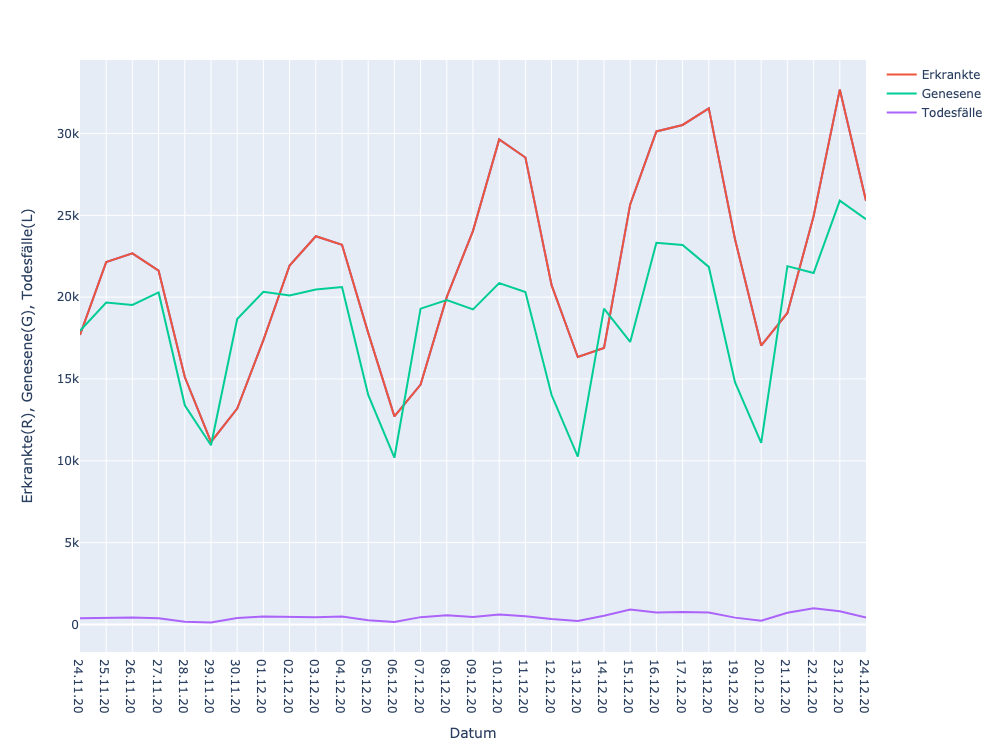

In [35]:
# Plot 
fig = px.line(county_date_df, x='Datum', y='Erkrankte')

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_date_df['Datum'], y=county_date_df['Erkrankte'], name='Erkrankte') # Not what is desired - need a line


# Only thing I figured is - I could do this 
fig.add_scatter(x=county_date_df['Datum'], y=county_date_df['Genesene'], name='Genesene') # Not what is desired - need a line

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_date_df['Datum'], y=county_date_df['Todesfälle'], name='Todesfälle') # Not what is desired - need a line 

fig.update_yaxes(title_text='Erkrankte(R), Genesene(G), Todesfälle(L)') 

# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2>Corona Test und Positiv Zahlen Deutschland pro KW <br>
und Hochrechnung als würde ab Frühjahr mit gleicher Testkappa getestet</h2>

Quelle: RKI https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Testzahlen-gesamt.xlsx?__blob=publicationFile

In [36]:
germany_df.head(48)

,cal_week,act_tests1,positiv1,positiv_per_tests1,in_perc1,plan_tests2,positiv2,in_perc2,labs_total
0,KW10,124716,3892,"0,03","3,1",1100000,34328,"3,1",90
1,KW 11,127457,7582,"0,06","5,9",1100000,65435,"5,9",114
2,KW 12,348619,23820,"0,07","6,8",1100000,75159,"6,8",152
3,KW 13,361515,31414,"0,09","8,7",1100000,95585,"8,7",151
4,KW 14,408348,36885,"0,09",9,1100000,99360,9,154
5,KW 15,380197,30791,"0,08","8,1",1100000,89086,"8,1",164
6,KW 16,331902,22082,"0,07","6,7",1100000,73185,"6,7",168
7,KW 17,363890,18083,"0,05",5,1100000,54663,5,178
8,KW 18,326788,12608,"0,04","3,9",1100000,42440,"3,9",175
9,KW 19,403875,10755,"0,03","2,7",1100000,29292,"2,7",182


<h2> Corona Positivkurven RKI (Rot) zu Hochgerechneten Zahlen (Grün) <br>
    wenn man durchgängig ca. 1,3 Mio: Tests pro Tag durchgeführt hätte</h2>

Quelle: Basis https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Testzahl.html

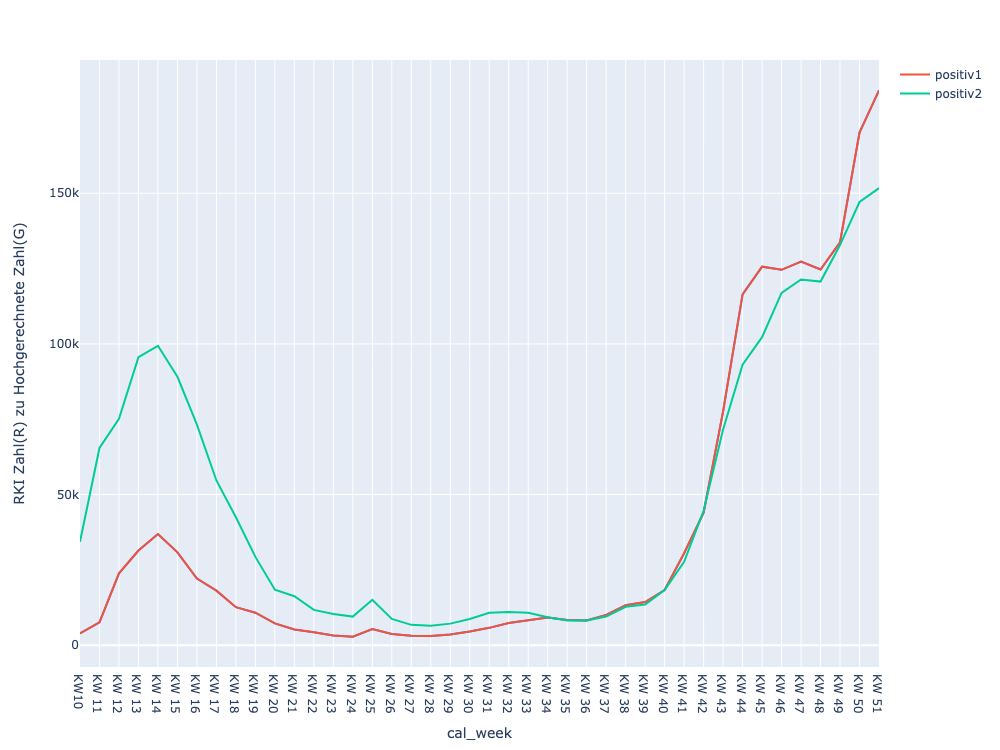

In [37]:
# Plot 
fig = px.line(germany_df, x='cal_week', y='positiv1')

# Only thing I figured is - I could do this 
fig.add_scatter(x=germany_df['cal_week'], y=germany_df['positiv1'], name='positiv1') # Not what is desired - need a line 

# Only thing I figured is - I could do this 
fig.add_scatter(x=germany_df['cal_week'], y=germany_df['positiv2'], name='positiv2') # Not what is desired - need a line 

fig.update_yaxes(title_text='RKI Zahl(R) zu Hochgerechnete Zahl(G)')

# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2> Entwicklung Corona Intensiv Behandlung zu Krankenhaus Betten Belegung in D </h2>

Daten werden durch Restart des Notebooks täglich aktualisiert

Quelle: https://www.divi.de/register/tagesreport

In [38]:
del intensiv_org_df['gemeindeschluessel']
intensiv_org_df['gemeindeschluessel'] = gemeinde_df
intensiv_org_df.insert(7, "betten_ges", "")
intensiv_org_df.insert(8, "Ant_Covid_a_ges", "")
sum_column = intensiv_org_df["betten_frei"] + intensiv_org_df["betten_belegt"]
intensiv_org_df["betten_ges"] = sum_column
sum_column2 = intensiv_org_df["faelle_covid_aktuell"] / intensiv_org_df["betten_ges"] * 100
intensiv_org_df["Ant_Covid_a_ges"] = sum_column2
pd.options.display.float_format = '{:.2f}'.format

In [39]:
cols = intensiv_org_df.columns.tolist()
# Rearrange the list any way you want
cols = cols[-1:] + cols[:-1]
intensiv_org_df = intensiv_org_df[cols]
intensiv_df = intensiv_org_df

In [40]:
intensiv_df.head()

,gemeindeschluessel,bundesland,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_beatmet,anzahl_standorte,betten_frei,betten_belegt,betten_ges,Ant_Covid_a_ges,daten_stand
0,D1001,1,3,1,1,2,15,29,44,2.27,2020-12-24 12:15:00
1,D1002,1,5,8,3,3,51,113,164,4.88,2020-12-24 12:15:00
2,D1003,1,2,8,6,2,39,99,138,5.80,2020-12-24 12:15:00
3,D1004,1,1,1,0,1,5,20,25,4.00,2020-12-24 12:15:00
4,D1051,1,1,2,2,1,7,31,38,5.26,2020-12-24 12:15:00


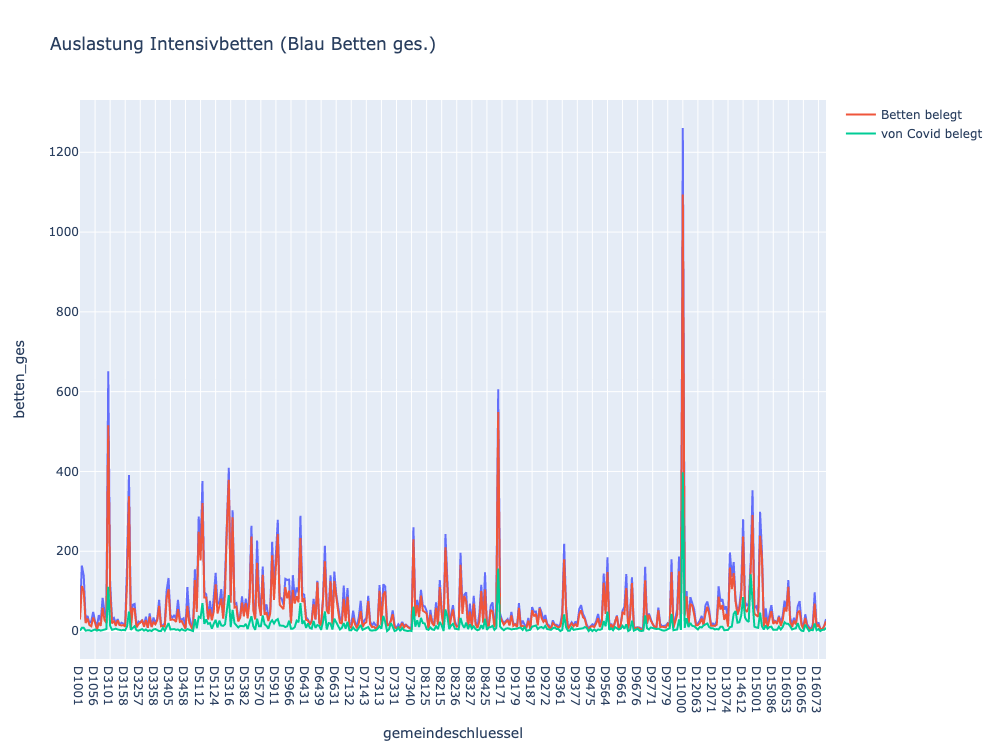

In [41]:
# Betten Gesamt
fig = px.line(intensiv_df, x='gemeindeschluessel', y='betten_ges', title="Auslastung Intensivbetten (Blau Betten ges.)")

# Betten belegt
fig.add_scatter(x=intensiv_df['gemeindeschluessel'], y=intensiv_df['betten_belegt'], name='Betten belegt')# Not what is desired - need a line  

# Covid Fälle Aktuell 
fig.add_scatter(x=intensiv_df['gemeindeschluessel'], y=intensiv_df['faelle_covid_aktuell'], name='von Covid belegt')# Not what is desired - need

# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2>Entwicklung Anzahl Krankenhäuser, Betten, Fallzahlen und Belegungstage in D</h2>

Jahre 1991 - 2018 (für 2019 und 2020 liegen keine offiziellen Zahlen vor
                   
Quelle: www.gbe-bund.de erstellt am 03.11.2020 

In [42]:
hospital_sort = hospital_df.sort_values('jahr', ascending=False)

In [43]:
hospital_sort.head(28)

,land,jahr,anzahl_kh,betten,fallzahlen,beleg_tage_1000,verweildauer,bett_auslast,aerzte,pfleger,sonst_pers,pers_gesamt
0,Deutschland,_2018,1925,498192,19392466,140225,"7,2","77,1",0,0,0,0
1,Deutschland,_2017,1942,497182,19442810,141152,"7,3","77,8",186021,1051625,84186,1321832
2,Deutschland,_2016,1951,498718,19532779,142170,"7,3","77,9",180372,1035209,82550,1298131
3,Deutschland,_2015,1956,499351,19239574,141281,"7,3","77,5",174391,1018461,81362,1274214
4,Deutschland,_2014,1980,500680,19148626,141534,"7,4","77,4",169528,1009153,80798,1259479
5,Deutschland,_2013,1996,500671,18787168,141340,"7,5","77,3",164720,999425,79775,1243920
6,Deutschland,_2012,2017,501475,18620442,142024,"7,6","77,4",159764,986768,79246,1225778
7,Deutschland,_2011,2045,502029,18344156,141676,"7,7","77,3",154248,974146,77858,1206252
8,Deutschland,_2010,2064,502749,18032903,141942,"7,9","77,4",148696,964263,75949,1188908
9,Deutschland,_2009,2084,503341,17817180,142414,8,"77,5",143967,952553,74675,1171195


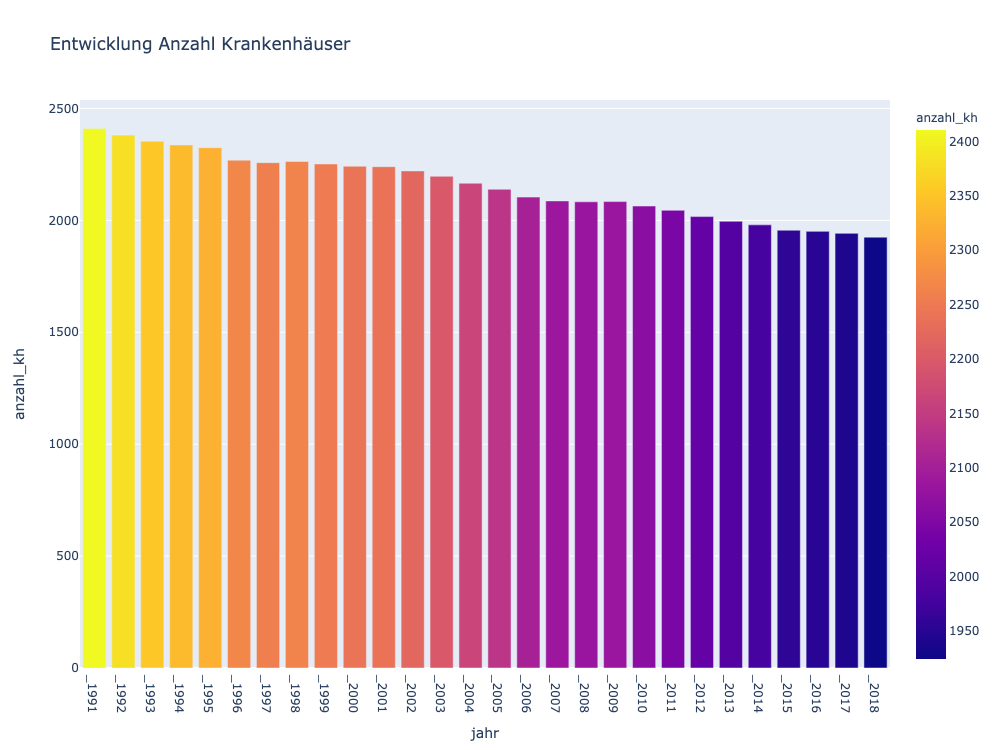

In [44]:
hospital_df1 = hospital_df.sort_values('jahr', ascending=True)

fig = px.bar(hospital_df1, x="jahr", y="anzahl_kh", color="anzahl_kh",title='Entwicklung Anzahl Krankenhäuser')
fig.show(renderer="png", width=1000, height=750)

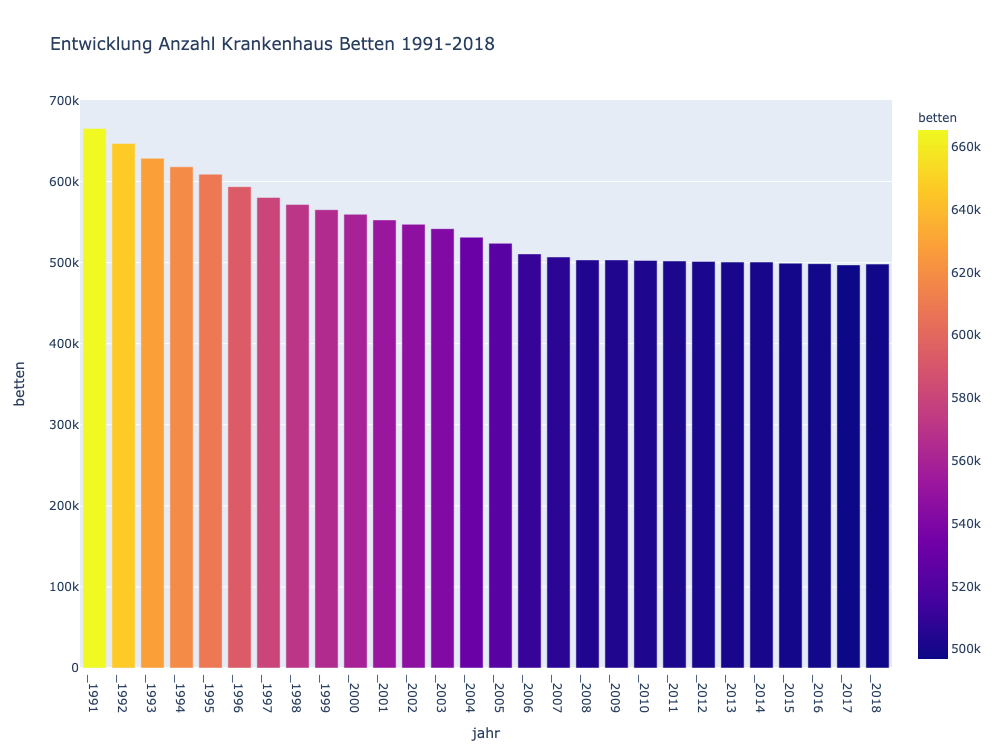

In [45]:
hospital_df2 = hospital_df.sort_values('jahr', ascending=True)

fig = px.bar(hospital_df2, x="jahr", y="betten", color="betten", title="Entwicklung Anzahl Krankenhaus Betten 1991-2018")
fig.show(renderer="png", width=1000, height=750)

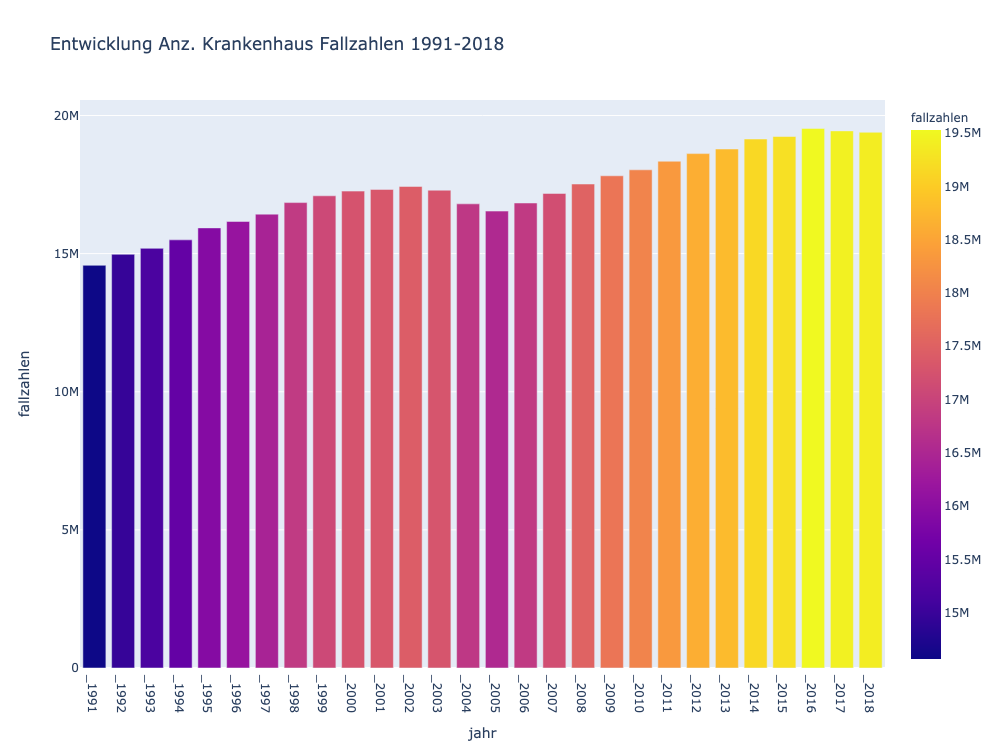

In [46]:
hospital_df3 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df3, x="jahr", y="fallzahlen", color="fallzahlen", title='Entwicklung Anz. Krankenhaus Fallzahlen 1991-2018')
fig.show(renderer="png", width=1000, height=750)

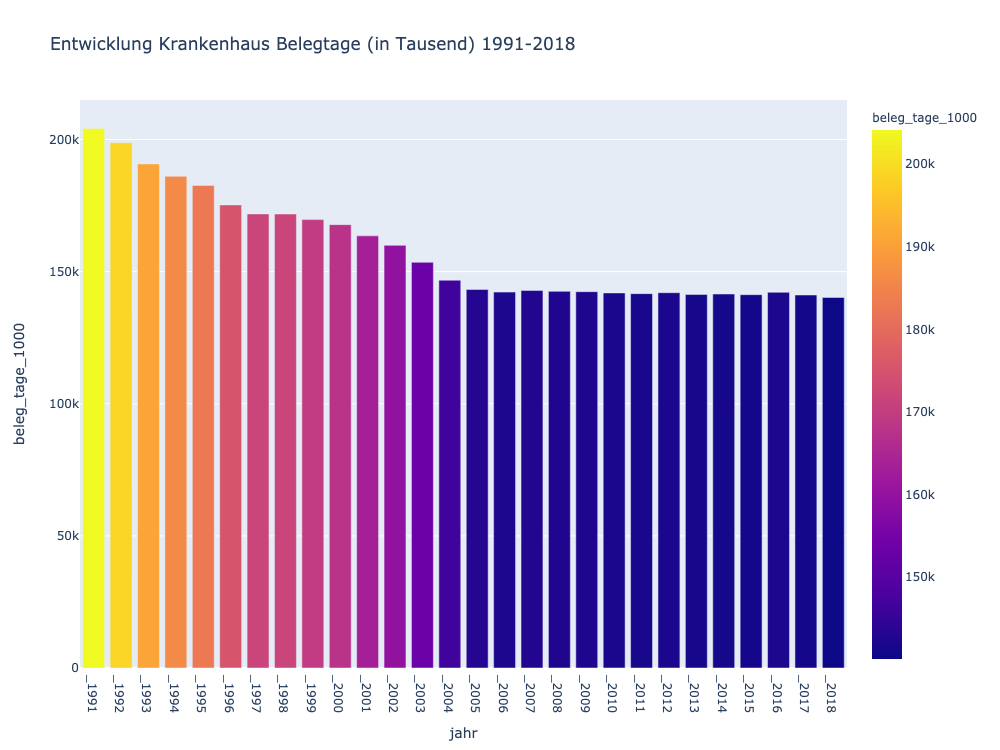

In [47]:
hospital_df4 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df4, x="jahr", y="beleg_tage_1000", color="beleg_tage_1000", title='Entwicklung Krankenhaus Belegtage (in Tausend) 1991-2018')
fig.show(renderer="png", width=1000, height=750)

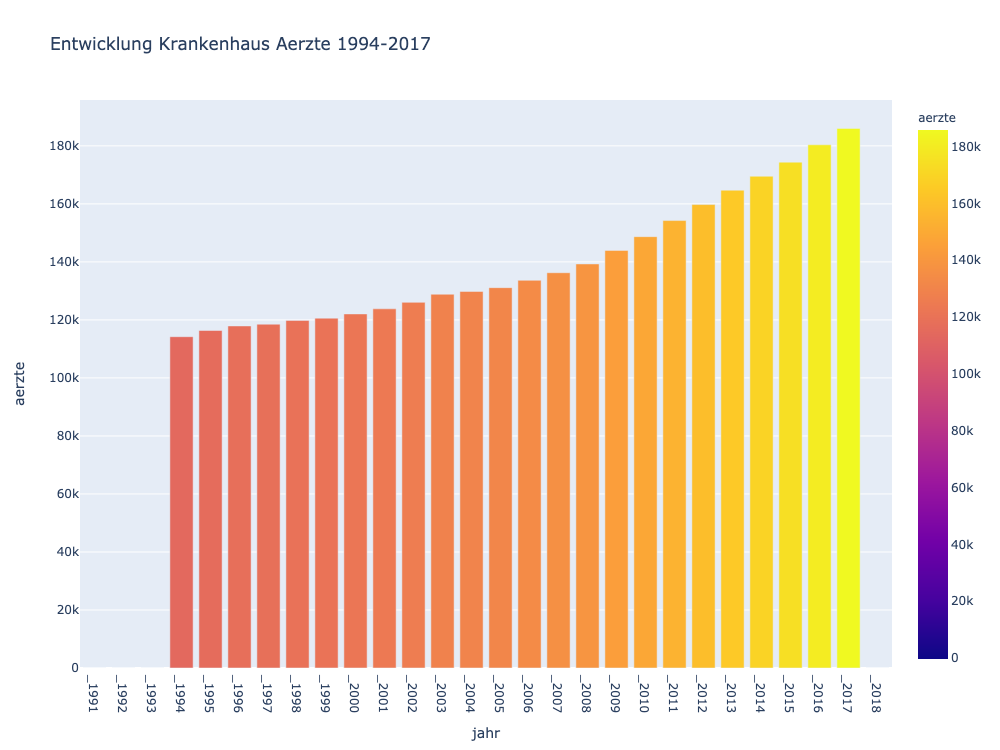

In [48]:
hospital_df5 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df5, x="jahr", y="aerzte", color="aerzte", title='Entwicklung Krankenhaus Aerzte 1994-2017')
fig.show(renderer="png", width=1000, height=750)

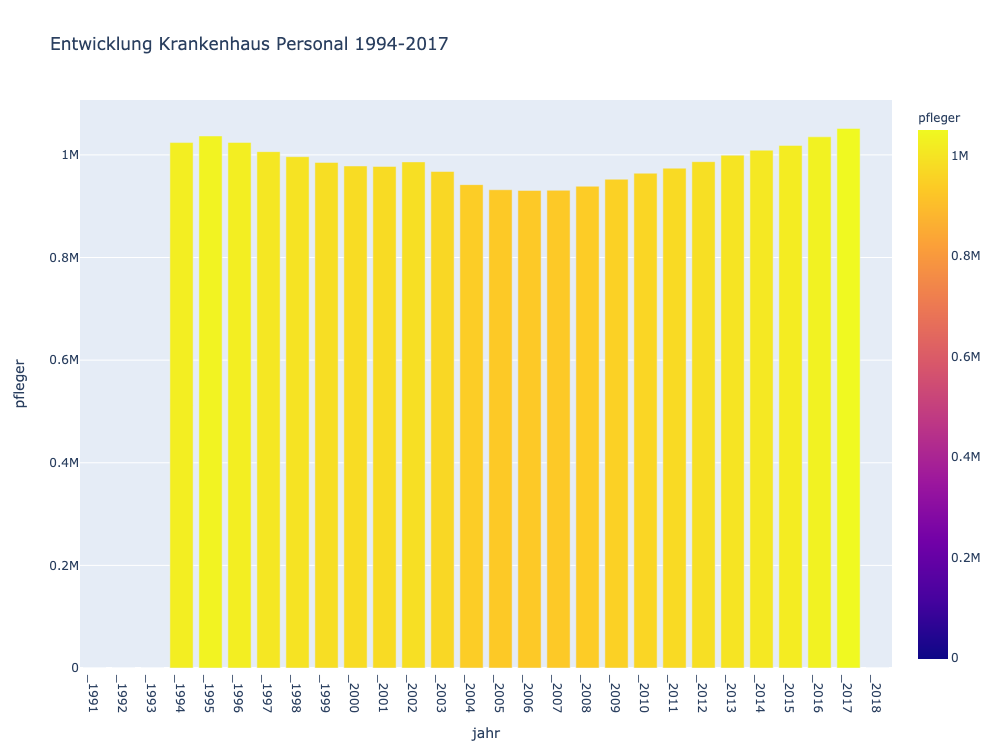

In [49]:
hospital_df6 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df6, x="jahr", y="pfleger", color="pfleger", title='Entwicklung Krankenhaus Personal 1994-2017')
fig.show(renderer="png", width=1000, height=750)

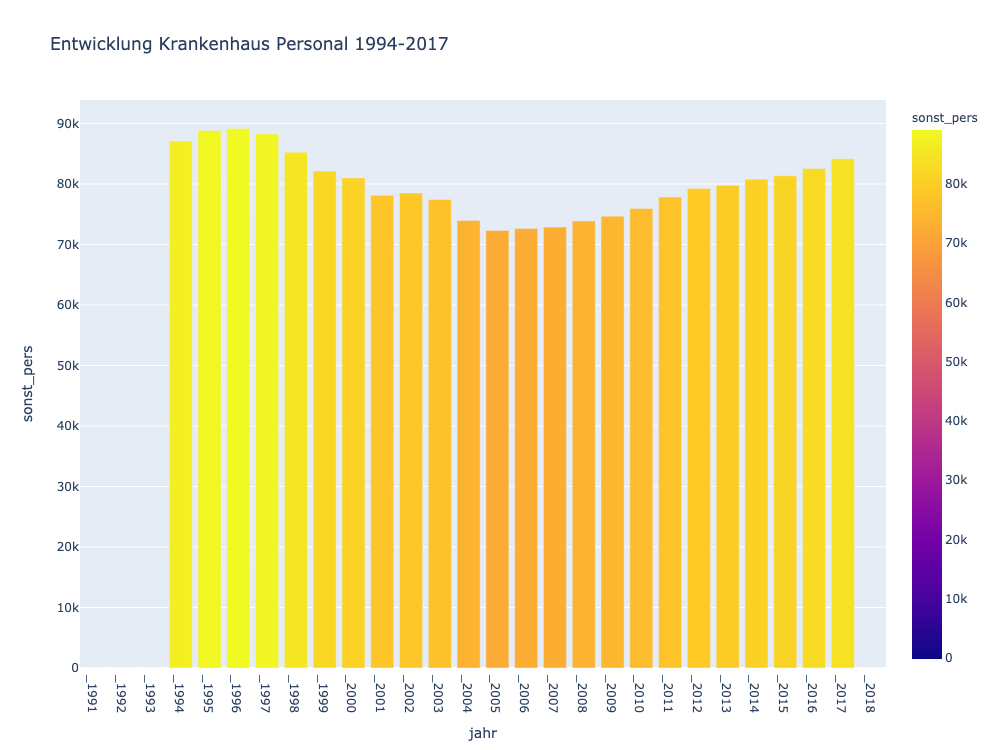

In [50]:
hospital_df7 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df7, x="jahr", y="sonst_pers", color="sonst_pers", title='Entwicklung Krankenhaus Personal 1994-2017')
fig.show(renderer="png", width=1000, height=750)